# Drzewa decyzyjne

Tematem dzisiejszych zajęć są drzewa decyzyjne przedstawione na ostatnim wykładzie. Zacznijny od prostego zbioru danych, który już się pojawił na naszych zajęciach:

In [46]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

X = pd.DataFrame(iris['data'])
y = pd.Series(iris['target'])

print("Nazwy kolumn:", iris['feature_names'])
print("Mapowanie klas:", iris['target_names'])

Nazwy kolumn: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Mapowanie klas: ['setosa' 'versicolor' 'virginica']


**zadanie 0** Oblicz średnią i wariancję dla każdej z zmiennych wejściowych.

Drzewa decyzyjne zostałuy zaimplementowane w pakiecie `sklearn`:

In [8]:
from sklearn import tree

In [22]:
model = tree.DecisionTreeClassifier('entropy')

**zadanie 1** Wytrenuj model korzystając z metody `fit` znanej z innych klasyfikatorów:

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Wyświetlenie drzewa dycyzyjnego

**zadanie 2** Sprawdź czy masz zainstalowany pakiet `graphviz`. Jeżeli nie, to zainstaluj go.

In [24]:
import graphviz 

In [25]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,  
                                filled=True, rounded=True,  
                                special_characters=True)  

In [26]:
graph = graphviz.Source(dot_data) 

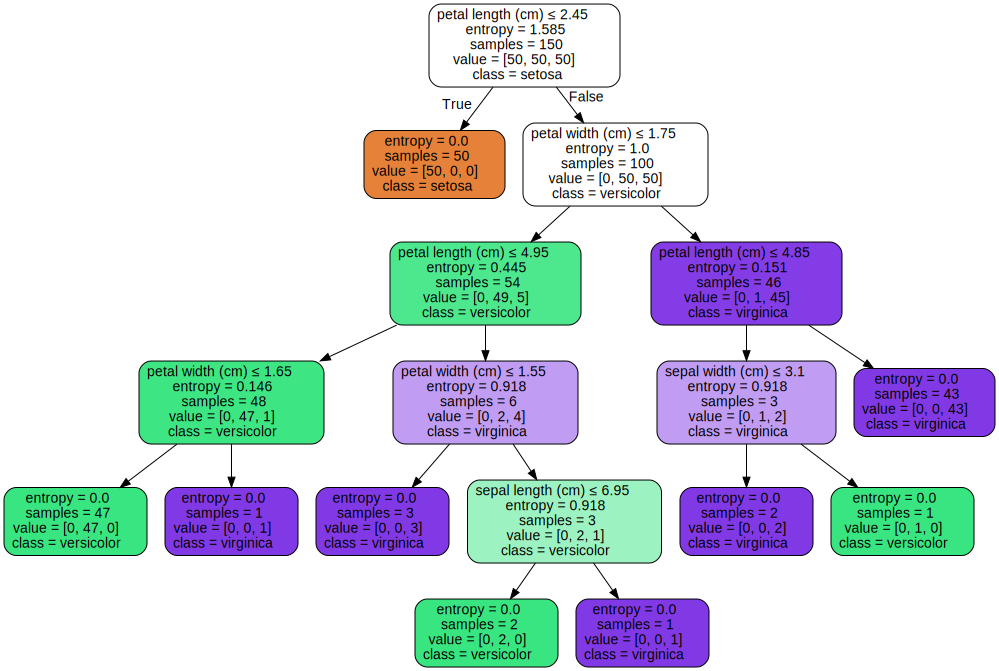

In [27]:
graph

**zadanie 3** Przeanalizuj powyższe drzewo:
 * Jak głębokie jest to drzewo?
 * CO oznacza lewa i prawa strzałka?
 * Co oznaczają poszczególne wartości w prostokątach?
 * Przeanalizuj jak zachowuje się entropia na poszczególnych poziomach.
 * Co oznaczają oznaczają poszczególne kolory?
 * Do której klasy zostanie przydzielony przykład: `[6.1, 2.8, 4.7, 1.2]`? Spróbuj przejść przez drzewo ręcznie.
 * Korzystając z metody `predict`, sprawdź czy nie pomyliłeś (pomyliłaś) się.
 * Korzystająć z metody `predict_proba`, sprawdź jak pewny jest model. Dlaczego jest taki wynik?

array([[0., 1., 0.]])

**zadanie 4** Zbuduj jeszcze raz drzewo `DecisionTreeClassifier` z następującymi parametrami. Wytrenuj go na tych samych danych i wyświetl go.
 * `criterion='gini'`
 * `max_depth=3`

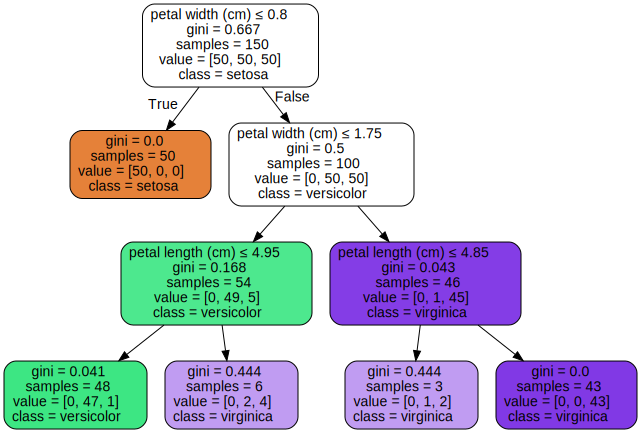

**zadanie 5** Zaklasyfikuj przykład `[6.1, 2.8, 4.7, 1.2]`: ręcznie i przy pomocy metody `predict`.

## Kreterium podziału

Zasadniczą kwestią jest w drzewach decyzyjnych jest proces dzielenia drzewa. Podział drzewa polega na znalezieniu cechy, która w "w jak najlepszy" sposób wydzieli jakąś wspólną część danych. Stosuje się dwa kryteria:
 * Entropia,
 * Współczynnik Giniego.
 
Pojęcie entropii pochodzi z teorii informacji i oblicza się wzorem:
$$
H(p) = - \sum_{x \in C}{p(x) \cdot log_2{p(x)}}
$$
gdzie C jest zbiorem możliwych klas. Wartość entropii interpretuje się współczynnik niepewności danych.
Na przykład, jeżeli nasz ciag danych zawiera tylko jedną wartość, to entropia jest równa 0. Natomiast, gdy występujące dwie wartości o takiej samej częstotliwości, to entropia jest równa 1.

**Przykład**

Obliczmy entropię w zestawie danych Iris. Mamy 150 przykładów, każdy z nich występuje 50 razy. Stąd prawdopodobieństwo wystąpienia każdej klasy to $\frac{1}{3}$. 

$$
H(Iris) = -(\frac{1}{3} \cdot log_2{\frac{1}{3}} + \frac{1}{3} \cdot log_2{\frac{1}{3}} + \frac{1}{3} \cdot log_2{\frac{1}{3}}) = -3 \cdot \frac{1}{3} \cdot log_2(\frac{1}{3}) = -log_2(\frac{1}{3}) = 1.585
$$

Porównaj z wartością w pierwszym bloku pierwszego wykresu.

## Entropia i drzewa decyzyjne

Powiedzmy, że mamy dwa kryteria podziału drzewa: A i B. Który z nich wybrać? Możemy posłużyć się entropią i obliczyć tzn. zysk z entropii: ile zmniejszy się entropia jeżeli zastosujemy dane kryterium.

**zadanie 6** Zaimplementu funkcję `entropy`, która oblicza wartość entropii dla danego ciągu liczb. Funkcja ma działać następująco:
 * na początku zlicza ile razy wystąpiła dana wartość.
 * Oblicza prawdopodobieństwo wystąpienia danej wartości.
 * Oblicza wartość entropii korzystając z powyższego wzoru.

In [73]:
def entropy(elems):
    pass

entropy([1,1,1, 2,2,2, 3,3,3])

**zadanie 7** Podziel zbiór danych Iris na dwa podzbiory stosując kryterium, że trzecia zmienna objaśniająca (petal length) jest $\leq2.45$. Wykorzystaj poniższy `DataFrame` data. Wynik zapisz do zmiennych `mniejszy_rowny` i `wiekszy`.

In [64]:
data = pd.DataFrame(iris.data)
data['type'] = pd.Series(iris.target)

**zadanie 8** Oblicz entropię na kolumnie ``type`` w każdym z podzbiorów.

1.0

Zysk z entropii obliczamy w następujący sposób (dla danych z Iris i powyższego podziału):

In [72]:
n = len(data.type)
entropy_gain = entropy(data.type) - (len(mniejszy_rowny) * entropy(mniejszy_rowny.type) + len(wiekszy) * entropy(wiekszy)) / n

print("Entropy gain:", entropy_gain)

Entropy gain: 1.3635006277286652


**zadanie 9** Powtórz dla kryterium `petal width (cm) ≤ 1.75`.

**zadanie 10** Zaimplementuj współczynnik Giniego.

**zadanie domowe** Wypróbuj drzewa decyzyjne na zbiorze `titanic` z pierwszych ćwiczeń. Umieść rozwiązanie w repozytorium na gonito.